In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing Appended BMMS file

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv('bmms_with_traffic_flow1.csv')

## Data Preparation
Let us first look at the top 30 most critical bridges.

In [27]:
# Sort DataFrame to find top 10 most critical bridges
top_30_critical = df.sort_values(by='Proportion truck', ascending=False).head(30)

In [7]:
# Filter DataFrame to find most vulnerable bridges (condition: D)
most_vulnerable = df[df['condition'] == 'D']

## Visualisations

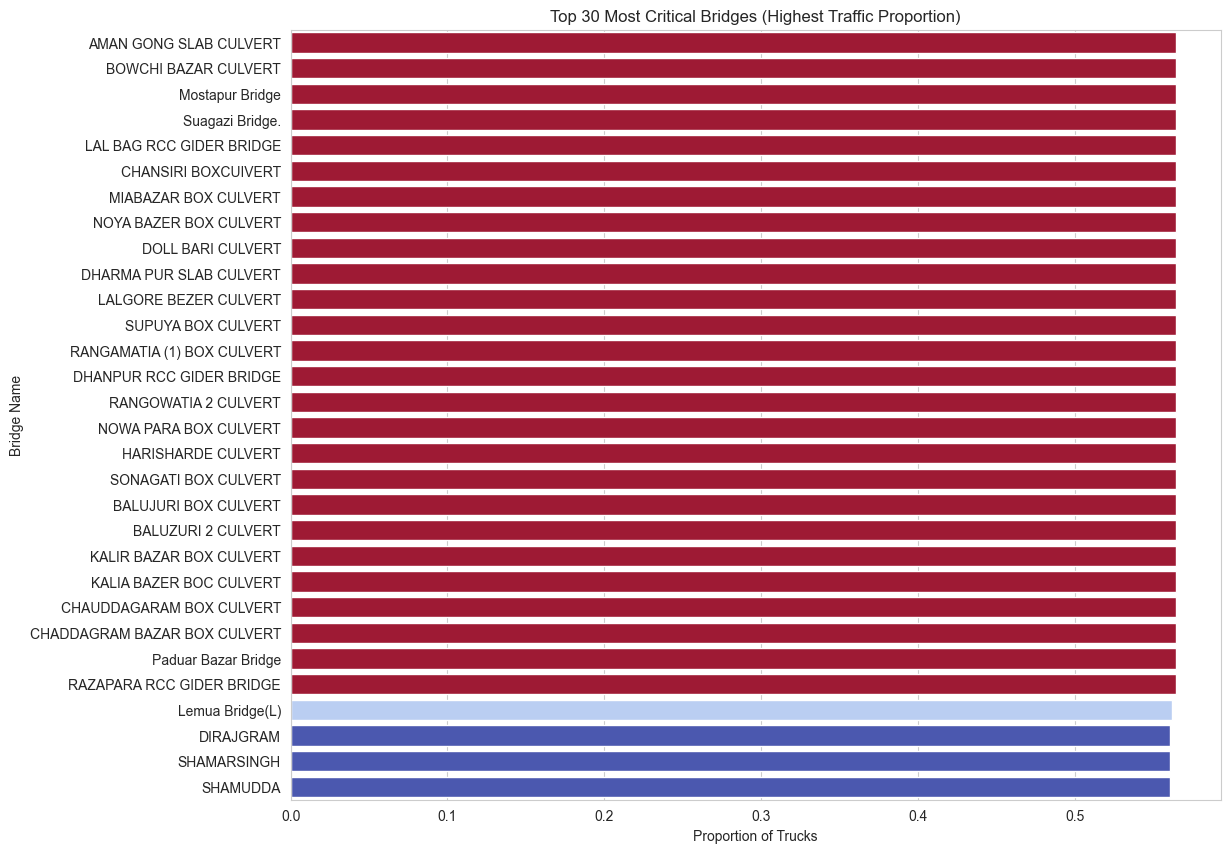

In [85]:
# Plotting top 10 most critical bridges
# Plotting top 10 most critical bridges without legend
# Define custom hues for each unique value of the x variable
# unique_roads = top_30_critical['Proportion truck'].unique()
# hues = sns.color_palette("hsv", n_colors=len(unique_roads))
# 
# hue_dict = dict(zip(unique_roads, hues))
plt.figure(figsize=(12, 10))
barplot = sns.barplot(x='Proportion truck', y='name', data=top_30_critical, palette='coolwarm', hue ='Proportion truck', legend=False)
plt.title('Top 30 Most Critical Bridges (Highest Traffic Proportion)')
plt.xlabel('Proportion of Trucks')
plt.ylabel('Bridge Name')

# Annotating road names beside the bars
for index, row in top_30_critical.iterrows():
    plt.annotate(row['road'], xy=(row['Proportion truck'], index), xytext=(5, 0), 
                 textcoords='offset points', va='center', ha='left', color='black', fontsize=10)

plt.show()

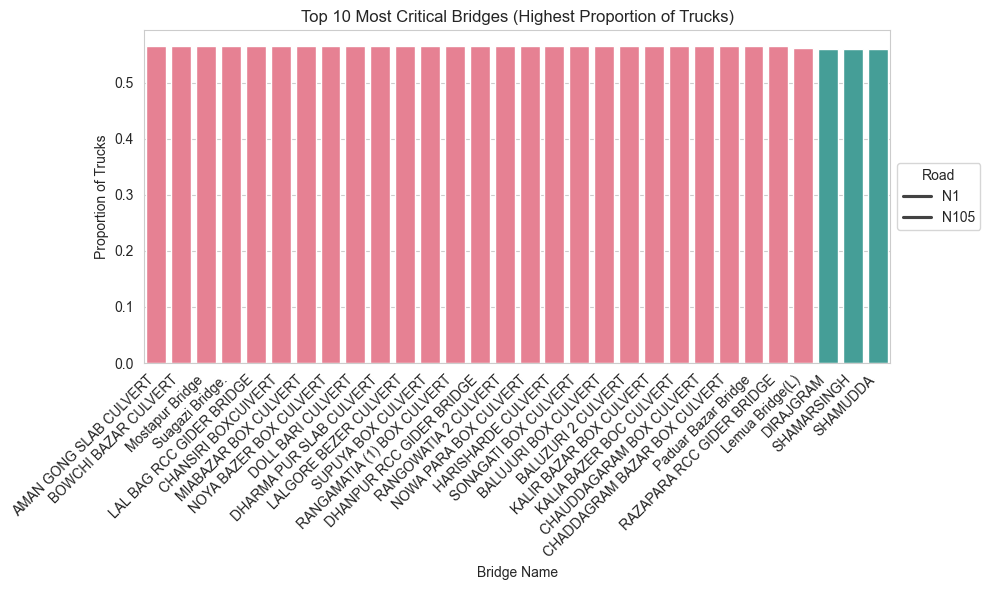

In [38]:
# Plotting top 10 most critical bridges without legend
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='Proportion truck', hue='road', data=top_30_critical,
            palette='husl', dodge=False)
plt.title('Top 10 Most Critical Bridges (Highest Proportion of Trucks)')
plt.xlabel('Bridge Name')
plt.ylabel('Proportion of Trucks')

# Adding custom legend to the right
legend_labels = top_30_critical['road'].unique()
plt.legend(title='Road', labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above graph shows that there are exactly 26 bridges with the same criticality. To decide between these 26 which are the top 10 most critical bridges, we decide on the basis of length, since all the bridges are on the same road (color). TODO

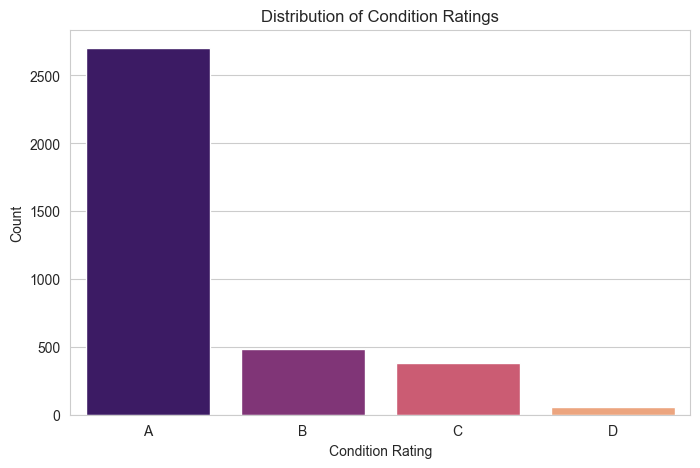

In [71]:
# Plotting distribution of condition ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=df, palette='magma', hue='condition', legend=False)
plt.title('Distribution of Condition Ratings')
plt.xlabel('Condition Rating')
plt.ylabel('Count')
plt.show()

C:\Users\TOT\AppData\Local\Temp\ipykernel_11088\210238748.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




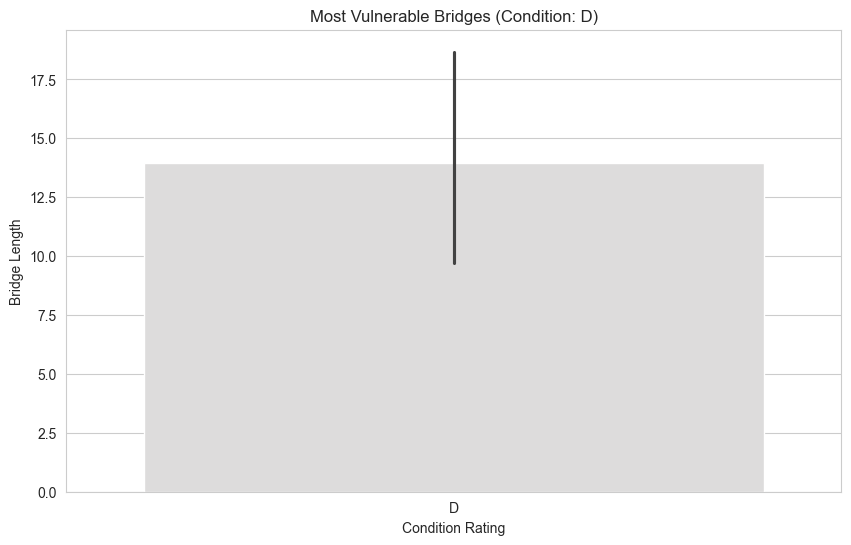

In [69]:
# Plotting most vulnerable bridges
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='length', data=most_vulnerable, palette='coolwarm')
plt.title('Most Vulnerable Bridges (Condition: D)')
plt.xlabel('Condition Rating')
plt.ylabel('Bridge Length')
plt.show()

In [70]:
# Statistical insights
print("Statistical Insights:")
print("Average length of most vulnerable bridges (Condition: D):", most_vulnerable['length'].mean())
print("Maximum proportion of trucks among top 10 critical bridges:", top_30_critical['Proportion truck'].max())

Statistical Insights:
Average length of most vulnerable bridges (Condition: D): 13.96603448275862
Maximum proportion of trucks among top 10 critical bridges: 0.5648804067005584
